In [1]:
import sys
from typing import List, Dict, Any, Union, Iterator, Literal

import sympy
from sympy import Expr, Point2D, Line2D, Basic, Equality
from sympy.plotting.plot import Plot
from sympy import Ellipse, Point, Line, S, Eq, latex, plot_implicit
from sympy import symbols, simplify, Rational, solve
from IPython.display import Latex

# Практическое занятие 15
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

Указание: составить словарь с ключами - названиями ('center', 'hradius', 'vradius' и т.п.) и значениями - атрибутами эллипса (.center, .hradius, ...), затем в цикле вывести все значения атрибутов из словаря вместе с названиями, например, "hradius=3".

In [3]:
ellipse = Ellipse(center=Point2D(1, 2), hradius=3, vradius=2)
props = {
    'eccentricity': ellipse.eccentricity,
    'area': ellipse.area,
    'circumference': ellipse.circumference,
    'center': ellipse.center,
    'hradius': ellipse.hradius,
    'vradius': ellipse.vradius,
    'periapsis': ellipse.periapsis,
    'apoapsis': ellipse.apoapsis,
    'focus\_distance': ellipse.focus_distance,
    'foci': ellipse.foci
}
display(Latex("$" + r'\\'.join((f'{key} = {latex(props[key])}') for key in props) + "$"))

<IPython.core.display.Latex object>

### Задание 2.
Вывести на экран **уравнение** эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные $u$ и $v$.

Изобразить на общем графике эллипс и повернутый эллипс.

**Указание:** по углу определить значение _slope аргумента метода equation (это тангенс угла наклона), использовать plot_implicit.

Eq((u + sqrt(3)*(v - 2)/3 - 1)**2/12 + 3*(v - sqrt(3)*(u - 1)/3 - 2)**2/16 - 1, 0)

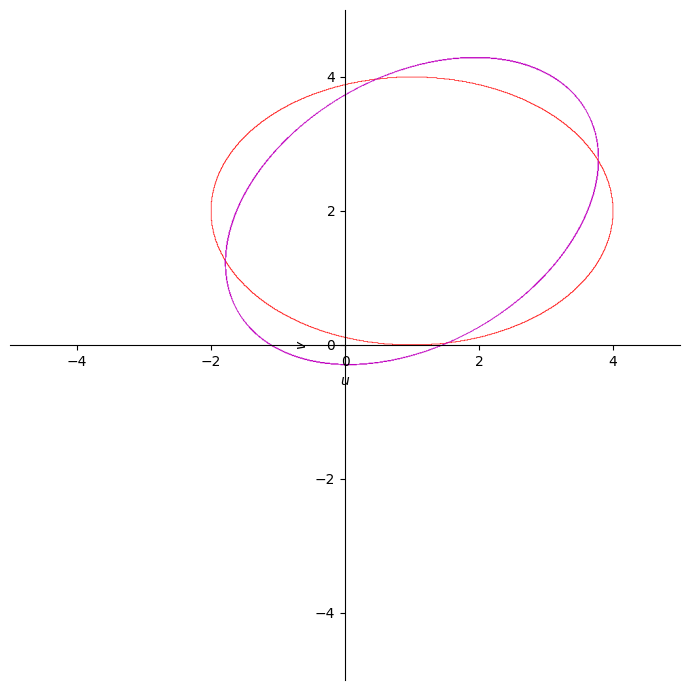

In [4]:
def degrees_to_rad(angle: Union[int, float, Basic]) -> Basic:
    return angle * sympy.pi / 180

eq: Expr = ellipse.equation(x='u', y='v')
tg_alpha = sympy.tan(degrees_to_rad(30))
eq_slope: Expr = ellipse.equation(x='u', y='v', _slope=tg_alpha)

display(Eq(eq_slope,0))
p: Plot = plot_implicit(
    eq,
    line_color='r',
    aspect_ratio=(1, 1),
    show=False,
    size=(7, 7)
)
p.extend(plot_implicit(
    eq_slope,
    line_color='m',
    aspect_ratio=(1, 1),
    show=False,
))
p.show()

### Задание 3.
Найти вершины эллипса из Задания 1.

**Указание:** вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через форкусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы.

In [5]:
eq1 = ellipse.equation()
symbs = {str(s): s for s in eq1.free_symbols}
line: Line2D = Line2D(*ellipse.foci)
eq2: Expr = line.equation()
roots1: List[Dict[Expr, Expr]] = solve((eq1, eq2), list(symbs.values()))

eq3: Expr = line.perpendicular_line(ellipse.center).equation()
roots2: List[Dict[Expr, Expr]] = solve((eq1, eq3), list(symbs.values()))

points: List[Point2D] = [Point2D(x, y) for x, y in (roots1 + roots2)]
display(*points)

Point2D(2, -2)

Point2D(2, 4)

Point2D(0, 1)

Point2D(4, 1)

### Задание 4.
Провести касательные к эллипсу из Задания 1 через его вершины.

Указание: использовать equation прямых Line, plot_implicit. Для корректного изображения на графике горизонтальных прямых в plot_implicit указывать диапазоны значений и переменной $x$ и переменной $y$.

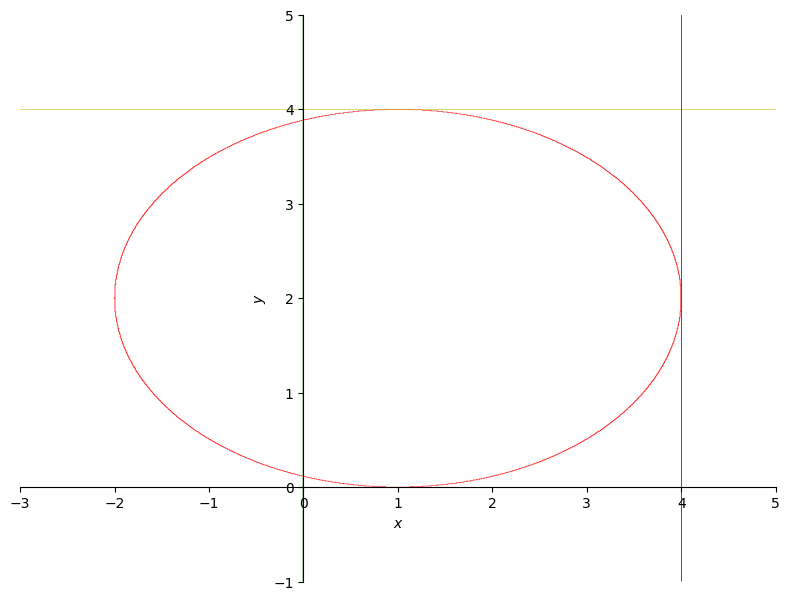

In [6]:
horiz_ellipse_axis: Line2D = Line2D(points[0], points[1])
vert_ellipse_axis: Line2D = Line2D(points[2], points[3])

colors_iterator: Iterator[Literal['m', 'y', 'g', 'b']] = iter(('m', 'y', 'g', 'b'))
eq: Expr = ellipse.equation(x='x', y='y')
p: Plot = plot_implicit(
    eq,
    (symbs['x'], -3, 5),
    (symbs['y'], -1, 5),
    line_color='r',
    aspect_ratio=(1, 1),
    show=False,
    size=(8, 8)
)
equations: List[Expr] = \
    [vert_ellipse_axis.parallel_line(point).equation() for point in points[:2]] + \
    [horiz_ellipse_axis.parallel_line(point).equation() for point in points[2:]]
for equation in equations:
    p.extend(plot_implicit(
        equation,
        (symbs['x'], -3, 5),
        (symbs['y'], -1, 5),
        line_color=next(colors_iterator),
        aspect_ratio=(1, 1),
        show=False
    ))

p.show()

### Задание 5**.
Построить дочерний класс эллипсов Ellipse_rot, в этом классе должна быть переменная угол поворота, по умолчанию 0 и матрица поворота rot_matr__, по умолчанию None. По умолчанию центр эллипса в начале координат, но при построении экземпляра пользователь может задать другой центр. При построении экземпляра класса пользователь должен иметь возможность задать угол поворота. Матрица поворота - внутренняя переменная, она должна изменяться только при вызове метода change_angle, изменяющего угол поворота.

**Атрибуты класса:**

**focus_distance** фокусное расстояние $c = \sqrt{a^2 - b^2}$

**foci фокусы** в виде кортежа из точек Point

**angle** угол наклона в радианах

**slope** тангенс угла наклона (None для угла, кратного $\pi / 2$, угол от $- 2 \pi$ до $2 \pi$)

**rot_matr** (не путать с rot_matr__!!!) - матрица поворота $\left(\begin{matrix}\cos\alpha&-\sin\alpha\\ \sin\alpha&\cos\alpha\end{matrix}\right).$


**Методы:**

**change_angle** аргумент - новое значение угла поворота, метод изменяет переменную angle и матрицу поворота

**equation** возвращает уравнение эллипса, соответствующее углу поворота эллипса, у этого метода необязательные аргументы - имена переменных, по умолчанию $x$ и $y$.


Протестировать полученный класс так: создать эллипс с осями 12 и 9, центр в точке $(-1, 2)$, угол поворота $\pi / 3$, вывести на экран его эксцентриситет, фокусное расстояние, фокусы, тангенс угла наклона, матрицу поворота и уравнение. Затем заменить угол поворота на $\pi / 4$ и вывести на экран те же атрибуты и результаты работы методов, только уравнение вывести с переменными $u$ и $v$.

###  Индивидуальное задание
Эллипс с центром $A$, вертикальной полуосью $b$ и эксцентриситетом $\varepsilon$.
Изобразить на графике эллипс, а также эллипс, повернутый на угол $\alpha$ градусов против часовой стрелки.

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.

'Центр эллипса:'

Point2D(3, 5)

'Фокусы эллипса:'

Point2D(3 - 2*sqrt(3)/3, 5)

Point2D(2*sqrt(3)/3 + 3, 5)

'Длины полуосей:'

'  Горизонтальная полуось:'

4*sqrt(3)/3

'  Вертикальная полуось:'

2

'Уравнение эллипса:'

Eq(3*(x - 3)**2/16 + (y/2 - 5/2)**2, 1)

'Вершины эллипса:'

Point2D(5, 3 - 4*sqrt(3)/3)

Point2D(5, 4*sqrt(3)/3 + 3)

Point2D(3, 3)

Point2D(7, 3)

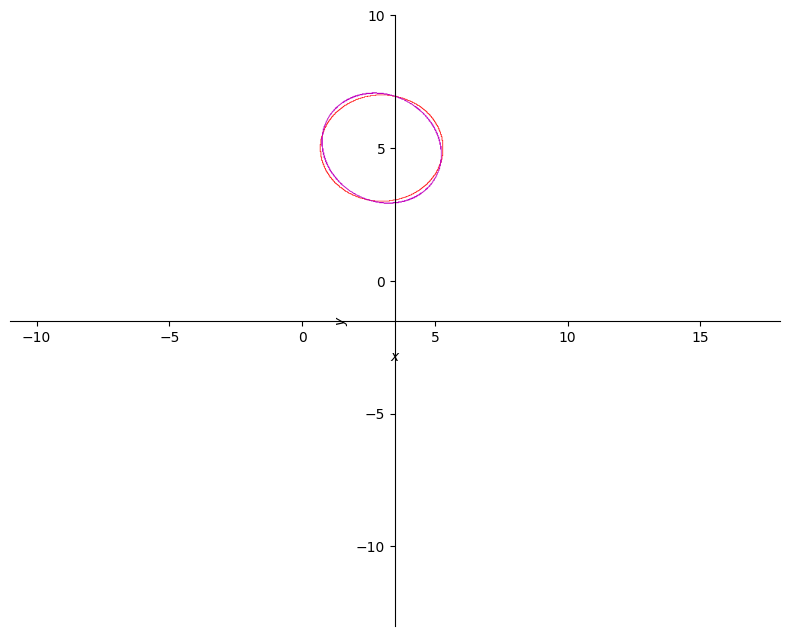

In [24]:

A: Point2D = Point2D(3, 5)
b: Expr = 2
epsilon: Expr = S(1)/2
ellipse: Ellipse = Ellipse(center=A, vradius=b, eccentricity=epsilon)

ellipse_equation: Expr = ellipse.equation()
ellipse_eq: Equality = Eq(ellipse_equation + 1, 1)
symbs: Dict[str, Basic] = {str(s): s for s in ellipse_equation.free_symbols}
line: Line2D = Line2D(*ellipse.foci)
eq2: Expr = line.equation()
roots1: List[Dict[Expr, Expr]] = solve((ellipse_equation, eq2), list(symbs.values()))

eq3: Expr = line.perpendicular_line(ellipse.center).equation()
roots2: List[Dict[Expr, Expr]] = solve((ellipse_equation, eq3), list(symbs.values()))

vertices: List[Point2D] = [Point2D(x, y) for x, y in (roots1 + roots2)]

alpha: Expr = -sympy.pi / 6
rotated_ellipse_eq: Expr = ellipse.equation(_slope=alpha)

display("Центр эллипса:", A)
print()
display("Фокусы эллипса:")
for x in ellipse.foci: display(x)
print()
display("Длины полуосей:")
display("  Горизонтальная полуось:", ellipse.hradius)
print()
display("  Вертикальная полуось:", ellipse.vradius)
print()
display("Уравнение эллипса:", ellipse_eq)
print()
display("Вершины эллипса:")
for x in vertices: display(x)

p: Plot = plot_implicit(
    ellipse_equation,
    (symbs['x'], -11, 18),
    (symbs['y'], -13, 10),
    line_color='r',
    aspect_ratio=(1, 1),
    show=False,
    size=(8, 8)
)
p.extend(plot_implicit(
    rotated_ellipse_eq,
    (symbs['x'], -11, 18),
    (symbs['y'], -13, 10),
    line_color='m',
    aspect_ratio=(1, 1),
    show=False,
))
p.show()